# The website link https://pokemondb.net/pokedex/all

In [1]:
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs

In [2]:
poke_data = pd.read_json("Pokemon Data-Updated.json")

# Which Generation had the highest stat total?

In [4]:
Generation_arrangement = poke_data.pivot_table(values = "Stat Total", index = "Generation",
                                               fill_value = "No Pokemon", aggfunc = [np.mean, np.median])

In [5]:
Generation_arrangement["mean"].sort_values("Stat Total", ascending = False)

,Stat Total
Generation,
Generation 6,504.407407
Generation 8,455.734375
Generation 4,451.766667
Generation 7,449.864407
Generation 9,444.333333
Generation 5,436.116959
Generation 3,413.307692
Generation 1,410.087500
Generation 2,407.038462


## We can see that Generation 6 has the highest mean stat total

### One possible reason for this is that all the megas are considered as generation 6 pokemon
#### Proof:

In [6]:
poke_data[poke_data["Mega"] == True].groupby("Generation")["Mega"].count()

Generation
Generation 6    48
Name: Mega, dtype: int64

#### Megas have a higher base stat average than regular Pokémon

In [7]:
poke_data.groupby("Mega")["Stat Total"].mean()

Mega
False    433.466725
True     617.750000
Name: Stat Total, dtype: float64

In [9]:
poke_data.columns

Index(['Pokemon Number', 'Stat Total', 'HP', 'Attack', 'Defense', 'Sp.Atk',
       'Sp.Def', 'Speed', 'Mega', 'First Type', 'Second Type', 'Species',
       'First Ability', 'Second Ability', 'Hidden Ability', 'Generation',
       'Egg Group 1', 'Egg Group 2', 'Is Sub Legendary', 'Is Legendary',
       'Is Mythical'],
      dtype='object')

#### And it is quite the difference!

### In competive pokemon legendary, mytical, and sub-legendary pokemon are usually banned

In [34]:
no_megas = poke_data[poke_data["Mega"] == False]
no_ml = no_megas[no_megas["Is Legendary"] == False]
no_mls = no_ml[no_ml["Is Sub Legendary"] == False]
no_mlsmy = no_mls[no_mls["Is Mythical"] == False]

In [35]:
no_mlsmy.pivot_table(values = "Stat Total", index = "Generation"
                                                 ).sort_values("Stat Total", ascending = False)

,Stat Total
Generation,
Generation 9,435.247619
Generation 8,421.075472
Generation 4,421.000000
Generation 6,420.628205
Generation 5,412.821192
Generation 7,411.772727
Generation 1,403.832258
Generation 2,397.090909
Generation 3,387.523438


## The powercreep since generations is real
##### As we can see the, generally the base stat total of new generations is higher than the old generations

<AxesSubplot:xlabel='count', ylabel='First Type'>

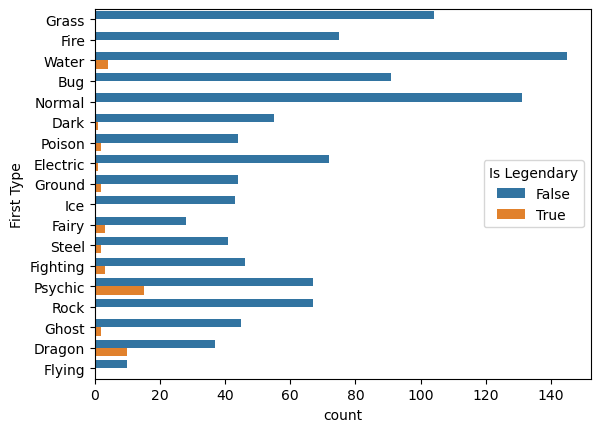

In [45]:
sns.countplot(y = "First Type", data = poke_data, hue = "Is Legendary")

In [6]:
#sns.scatterplot(y = "First Type", x = "Stat Total", data = poke_data, hue = "Generation", palette = hue_colors)

In [46]:
hue_colors = {
    "Generation 1" : "blue",
    "Generation 2" : "gold",
    "Generation 3" : "green", 
    "Generation 4" : "silver",
    "Generation 5" : "black",
    "Generation 6" : "pink",
    "Generation 7" : "yellow",
    "Generation 8" : "purple",
    "Generation 9" : "violet",
}

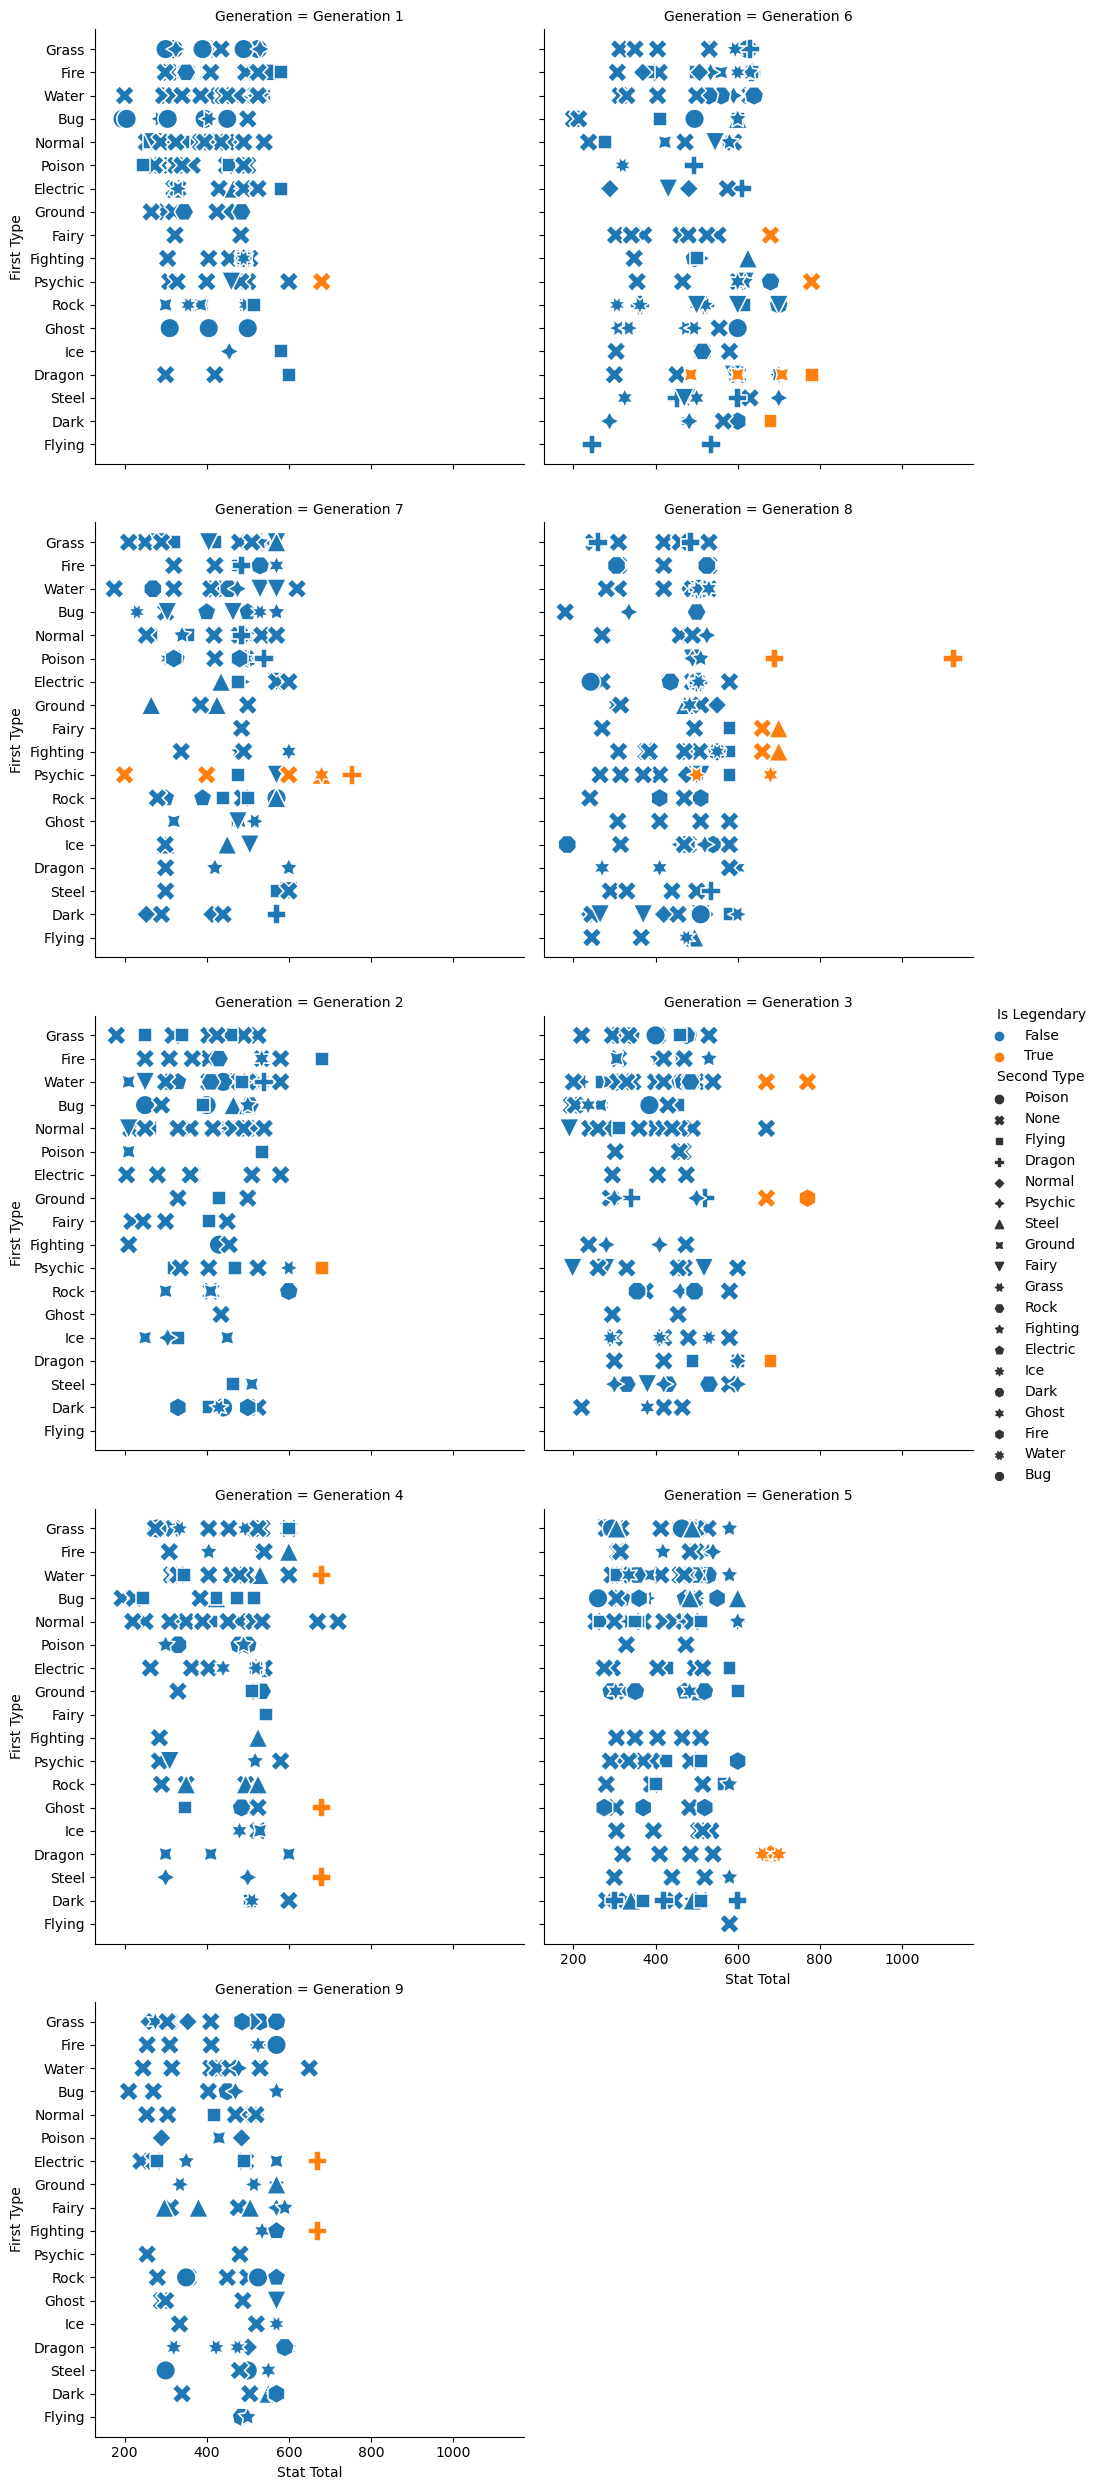

In [47]:
sns.relplot(x = "Stat Total",
            y = "First Type", 
            data = poke_data,
            kind = "scatter", 
            col = "Generation",
            col_wrap = 2,
            style = "Second Type",
            hue = "Is Legendary",
            s = 200,
            )

### Legendary pokemon are usually only of one type, as indicated by the X, also they are usually at the higher end of the stat total, generation 1 had the fewest legendaries, and Generation 8 has the most

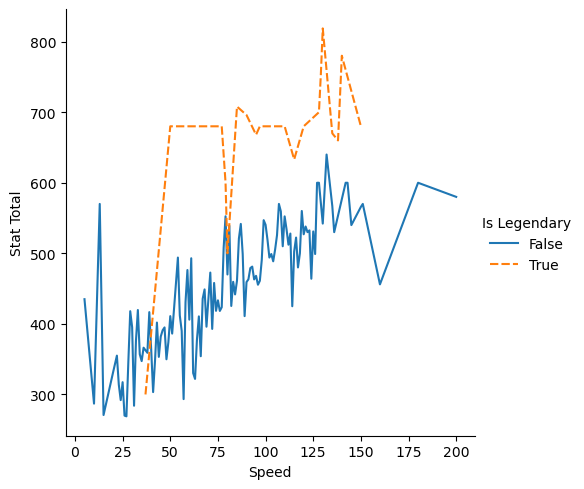

In [48]:
sns.relplot(
    x = "Speed",
    y = "Stat Total",
    data = poke_data,
    kind = "line",
    style = "Is Legendary",
    hue = "Is Legendary",
    ci = None,
)

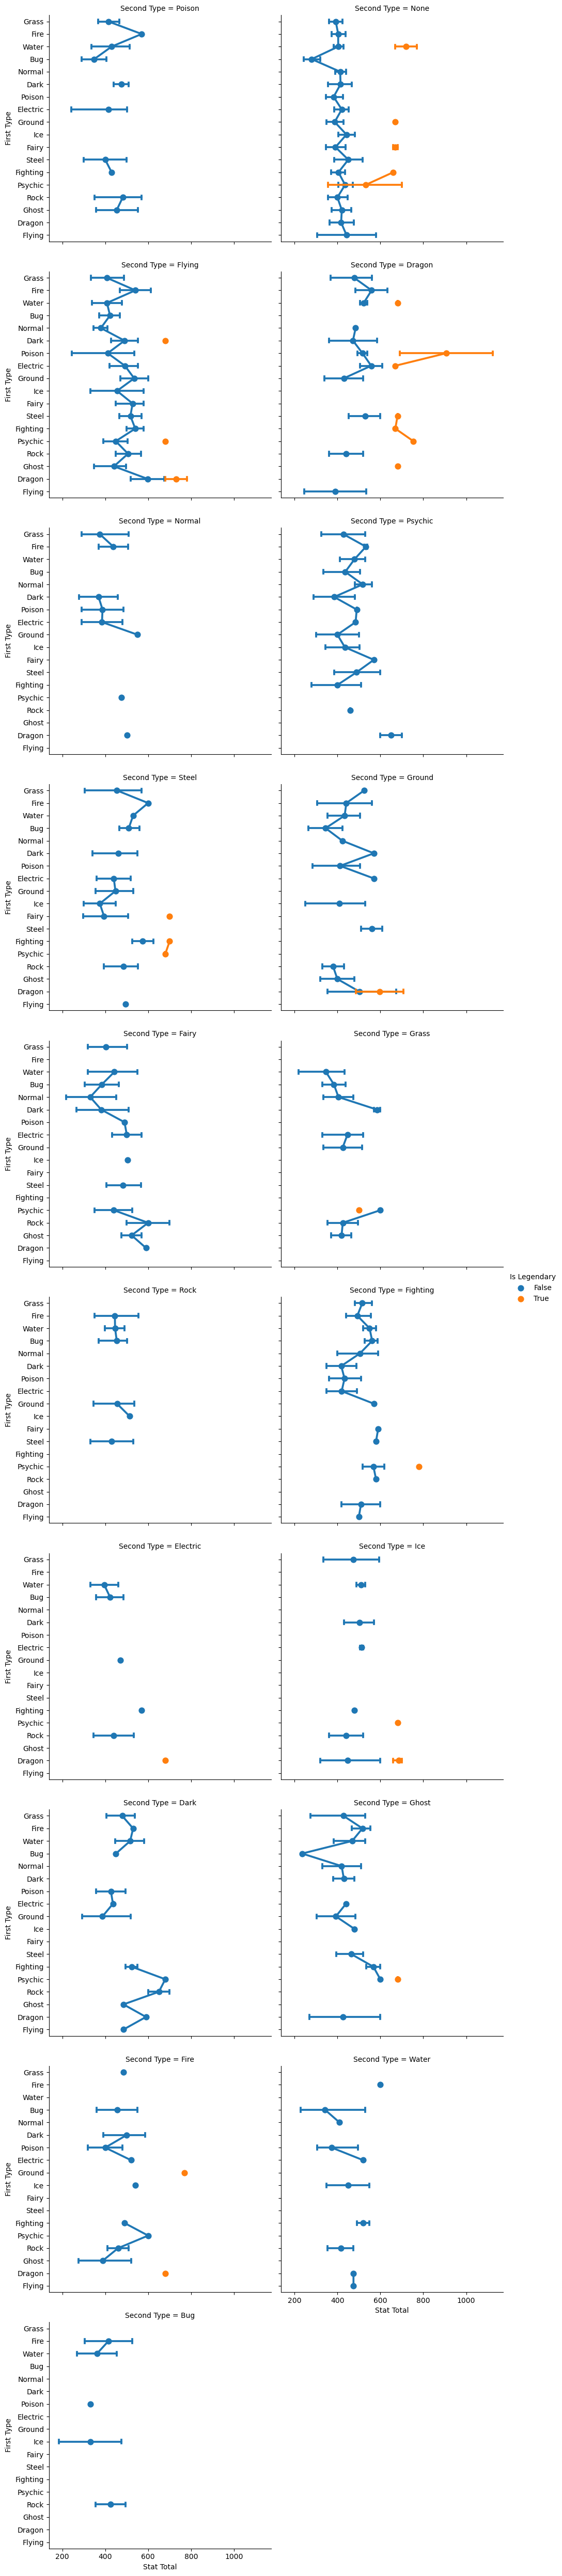

In [49]:
sns.catplot(
    data = poke_data,
    y = "First Type",
    x= "Stat Total",
    kind = "point",
    hue = "Is Legendary",
    col = "Second Type",
    col_wrap = 2,
    capsize = .3,

)

In [52]:
poke_data.to_csv("Pokemon_Data.csv")